In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import micrograd.nn as nn 
from micrograd.core import Tensor 
import micrograd.optim as optim

w [[ 0.30702444 -0.36493573 -0.29164904]
 [ 0.15118853  0.32584321 -0.19973941]
 [ 0.213185    0.2343948   0.39887759]]
b [[ 0.00804121  0.49377052 -0.49821188]]

after:
w [[1.0006094  2.00940396 3.00934047]
 [4.01387126 5.01850867 6.01656738]
 [7.02552156 8.02559603 9.02416641]]
b [[0.99755002 1.99254109 2.99109363]]


/home/valle/Projekt/ML/micrograd/micrograd/ops.py:74: RuntimeWarning: invalid value encountered in log
  return gy * b * a**(b-1), gy * a**b * np.log(a)


0.6826818485203174

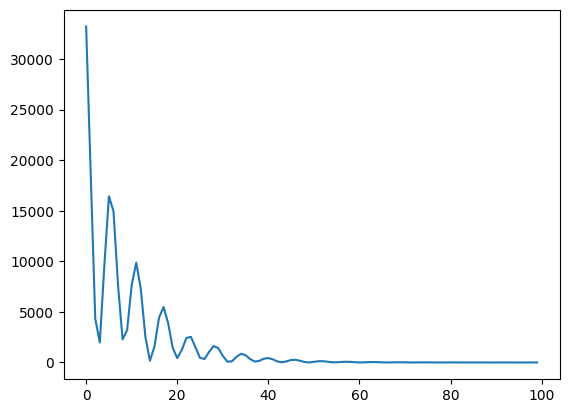

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float32)
b = np.array([1, 2, 3], dtype=np.float32)

def f(x: np.ndarray):
    return A @ x + b

N = 100
xn, yn = 3, 3
xs = Tensor(np.random.randn(N, xn))
ys = Tensor(np.apply_along_axis(f, 1, xs.data))

net = nn.Linear(xn, yn)
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

def train(epochs: int=1):
    losses = []
    for i in range(epochs):
        optimizer.zero_grad()
        y = net(xs)
        loss = ((y - ys)**2).sum()
        losses.append(loss.data.item())
        loss.backward()
        optimizer.step()
    return losses

print("w", net.weight.data)
print("b", net.bias.data)
losses = train(epochs=100)
print("\nafter:")
print("w", net.weight.data)
print("b", net.bias.data)
plt.plot(losses)
losses[-1]

In [3]:
m = nn.Linear(3, 3)
o = optim.SGD(m.parameters(), lr=1e-2)

m.weight.data = np.zeros_like(m.weight.data)
m.weight.grad = np.ones_like(m.weight.grad)

o.step()

m.weight

T(., d=[[-0.01 -0.01 -0.01]
 [-0.01 -0.01 -0.01]
 [-0.01 -0.01 -0.01]], g=[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]])